In [1]:
# Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load DataSets

In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
# Check for missing values
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())


Missing Values:
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


Inspect Data

In [4]:
# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [5]:
# Describe
print("\nMerged Data Statistics:")
print(merged_data.describe())


Merged Data Statistics:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [6]:
# Convert date columns to datetime
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

Exploratory Data Analysis (EDA)


Top 10 Revenue-Generating Products:
ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


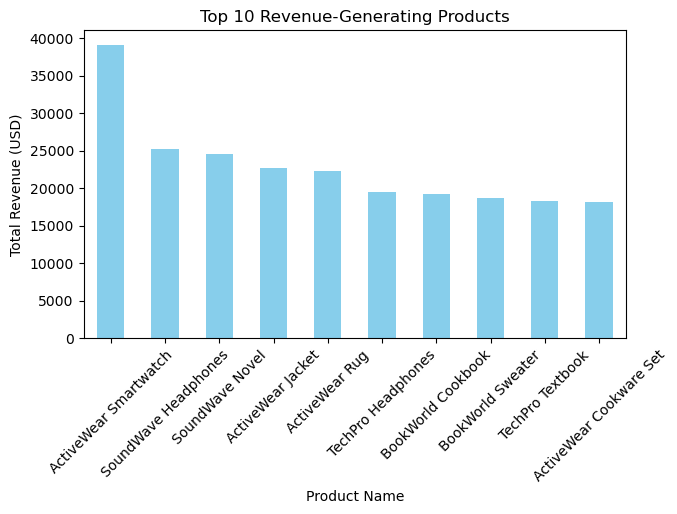

In [7]:
# Top revenue-generating products
top_products = merged_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Revenue-Generating Products:")
print(top_products)

plt.figure(figsize=(7, 4))
top_products.plot(kind="bar", color="skyblue")
plt.title("Top 10 Revenue-Generating Products")
plt.xlabel("Product Name")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

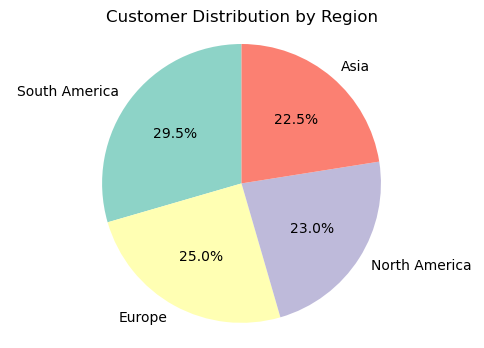

In [8]:
# Revenue by region
region_revenue = merged_data.groupby("Region")["TotalValue"].sum()
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(region_counts)))
plt.title('Customer Distribution by Region')
plt.axis('equal')
plt.show()

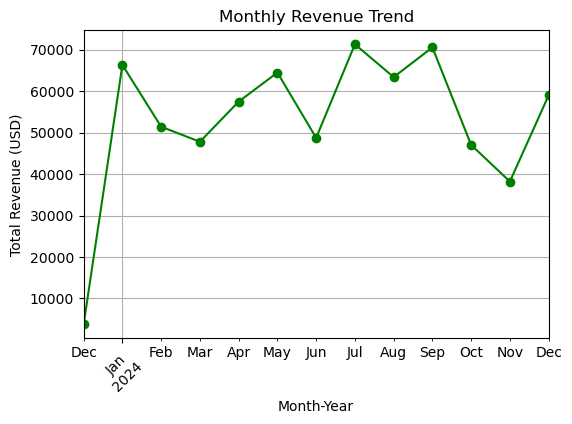

In [15]:
# Monthly revenue trend
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_revenue = merged_data.groupby("MonthYear")["TotalValue"].sum()

plt.figure(figsize=(6,4))
monthly_revenue.plot(marker='o', color="green")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.grid()
plt.show()


Revenue by Product Category:
Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


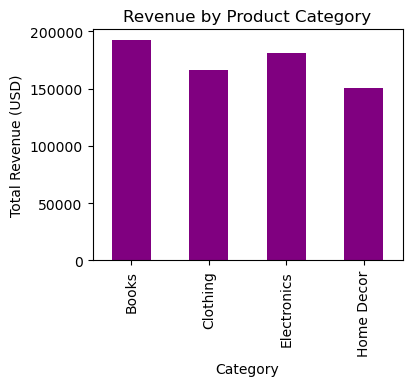

In [16]:
# Product category performance
category_revenue = merged_data.groupby("Category")["TotalValue"].sum()
print("\nRevenue by Product Category:")
print(category_revenue)

plt.figure(figsize=(4, 3))
category_revenue.plot(kind="bar", color="purple")
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue (USD)")
plt.show()

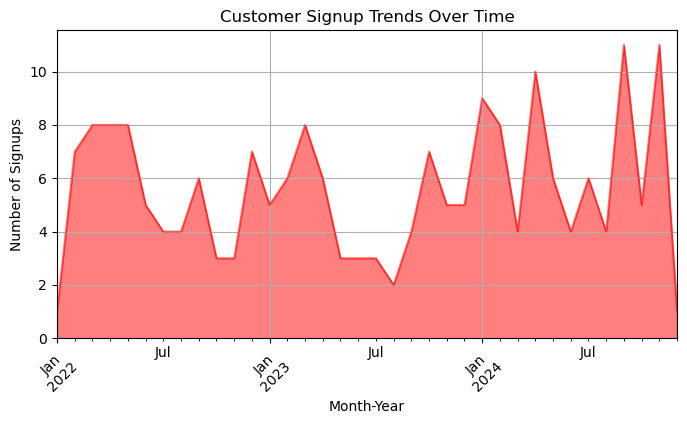

In [20]:
# Signup Trends
signup_trend = customers.groupby(customers['SignupDate'].dt.to_period('M')).size()
plt.figure(figsize=(8, 4))
signup_trend.plot(kind="area", color="red", alpha=0.5)
plt.title("Customer Signup Trends Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Number of Signups")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [21]:
#Customer lifetime value
clv = merged_data.groupby('CustomerID')['TotalValue'].sum()
print(clv.describe())

count      199.000000
mean      3467.314372
std       1832.677958
min         82.360000
25%       2162.040000
50%       3137.660000
75%       4770.225000
max      10673.870000
Name: TotalValue, dtype: float64


Region-specific Sales:

Customers from South America generate the highest revenue, contributing 29.5% of total sales. Focus marketing campaigns in these regions.

Top Product:

Products in the ActiveWear SmartWatch category drive the most sales. Expand product offerings in this category.

Seasonality:

Sales least during Nov. Plan promotions to increase the sales in Nov.

Customer Spending Distribution:

With a mean of $3467 and a maximum of $10,673, a few high-spending customers drive major sales. Focus on retaining these high-value customers.

Marketing to increase signups:

Customer signups show seasonal spikes, with increasing trends in late 2023 and early 2024. Increase marketing during May to August to increase sign up in these months.